In [ ]:
# run under DIP environment
# !conda env create -f environment.yml


CondaValueError: prefix already exists: C:\Users\user\anaconda3\envs\DIP



## Load Data

DD_PARS_blood (from out lab)

In [ ]:
import scipy.io as sio
file_name  = 'data\DD_PARS\DD_PARS_blood.mat'
mat = sio.loadmat(file_name)
img_down = mat["DD_PARS_blood"]

In [ ]:
from utils.expand_data import *
img_masked, img_mask = expand_data(img_down, 128, 128)

Plot the loaded data

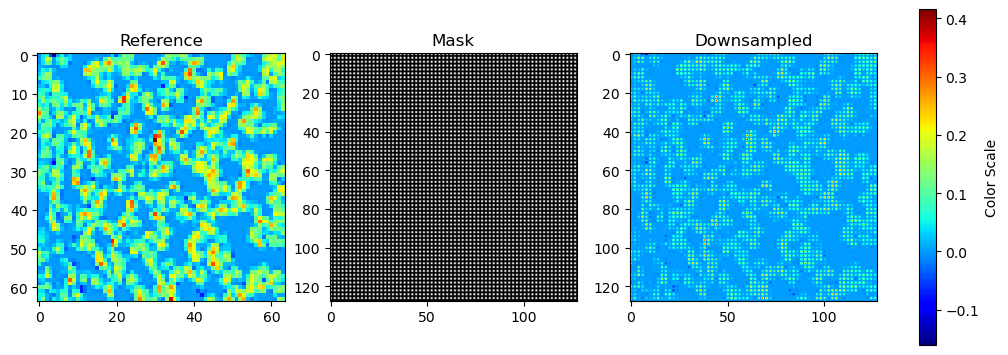

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 5), constrained_layout=True)

colormap = 'jet'
# plot each image
im1 = axes[0].imshow(img_down, cmap=colormap)
axes[0].set_title("Reference")

im2 = axes[1].imshow(img_mask, cmap = 'gray')
axes[1].set_title("Mask")

im3 = axes[2].imshow(img_masked,cmap=colormap)
axes[2].set_title("Downsampled")

# add colorbars
cbar = fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label("Color Scale")

plt.show()


## Pre-work of DIP

In [ ]:
import torch
import torch.optim
torch.__version__

'2.0.1'

Set inputs, hyperparameters and network architecture

In [ ]:
img_np = np.expand_dims(img_masked, 0)  # expand the downsampled image to 3D numpy array (1, H, W)
mask_np = np.expand_dims(img_mask, 0)   # expand the mask to 3D numpy array (1, H, W)

from models.skip import skip
from utils.inpainting_utils import *

#from skimage.measure import compare_psnr,compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

PLOT = True
imsize = -1
dim_div_by = 64

# setup
pad = 'reflection' # 'zero'
OPT_OVER = 'net'
OPTIMIZER = 'adam'
# Same params and net as in super-resolution and denoising
INPUT = 'noise'
input_depth = 32
LR = 0.001 
num_iter = 1000
param_noise = False
show_every = 50
save_every = 10
figsize = 5
reg_noise_std = 0.03
    
net = skip(input_depth, img_np.shape[0], 
           num_channels_down = [128] * 5,
           num_channels_up =   [128] * 5,
           num_channels_skip =    [4] * 5,  
           filter_size_up = 3, filter_size_down = 3, 
           upsample_mode='bilinear', filter_skip_size=1,
           need_sigmoid=False, need_bias=True, pad=pad, act_fun='LeakyReLU').type(dtype)
    

net = net.type(dtype)
net_input = get_noise(input_depth, INPUT, img_np.shape[1:]).type(dtype) # generate a random noise input tensor (1, input_depth, H, W)
# net_input = get_noise(input_depth, INPUT, img_np.shape[1:], 'n').type(dtype) # generate a random noise input tensor (1, input_depth, H, W)
# Compute number of parameters
s  = sum(np.prod(list(p.size())) for p in net.parameters())
print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_var = np_to_torch(img_np).type(dtype)   # convert numpy array to torch tensor (1, 1, H, W)
mask_var = np_to_torch(mask_np).type(dtype) # convert numpy array to torch tensor (1, 1, H, W)


Number of params: 2217573


Create the numpy to save the reults for each [save_every] iteration and processing time (in second)

In [ ]:
out_log_np = np.zeros(shape = (num_iter//save_every, img_masked.shape[0], img_masked.shape[1]))
time_log_np = np.zeros(shape = (1, num_iter//save_every))

show the input noise

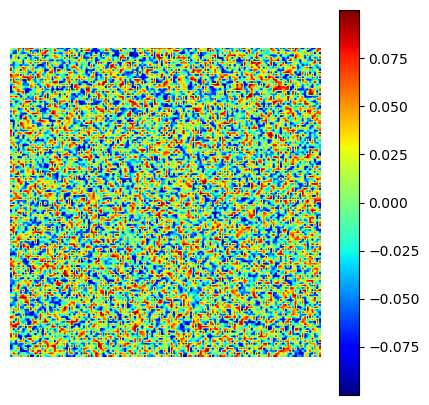

In [ ]:
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(torch_to_np(net_input).transpose(1, 2, 0)[:,:,0], cmap='jet')   
plt.colorbar()

# DIP process

Starting optimization with ADAM


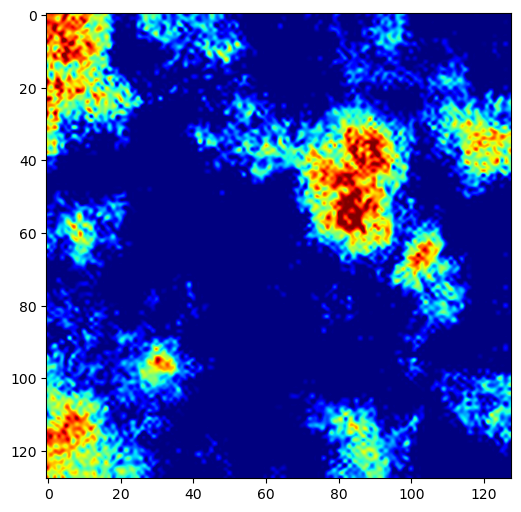

Elasped time:17.25
Elasped time:17.858Loss 0.002682    PSNR 19.457337    SSIM 0.069502 
Elasped time:18.175Loss 0.001639    PSNR 22.431438    SSIM 0.132421 
Elasped time:18.475Loss 0.001298    PSNR 23.075328    SSIM 0.145648 
Elasped time:18.778Loss 0.001188    PSNR 23.271217    SSIM 0.157147 


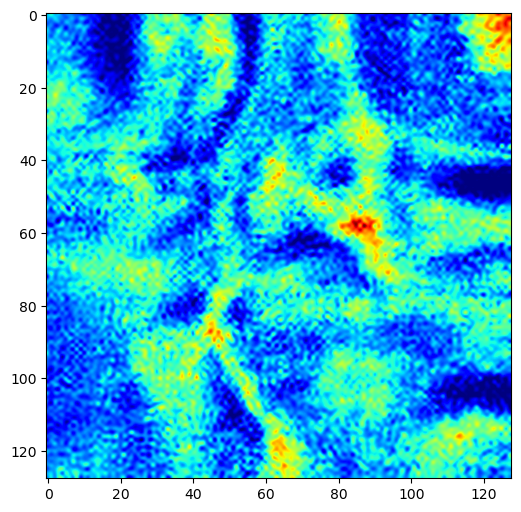

Elasped time:19.74
Elasped time:20.065Loss 0.001037    PSNR 23.385735    SSIM 0.169852 
Elasped time:20.398Loss 0.000984    PSNR 23.252060    SSIM 0.172057 
Elasped time:20.729Loss 0.000932    PSNR 23.374257    SSIM 0.182049 
Elasped time:21.032Loss 0.000895    PSNR 23.262120    SSIM 0.183301 


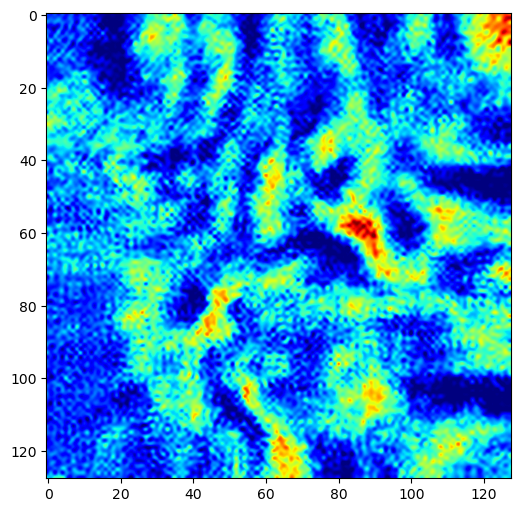

Elasped time:21.981
Elasped time:22.545Loss 0.000803    PSNR 23.136935    SSIM 0.195194 
Elasped time:22.892Loss 0.000762    PSNR 23.115923    SSIM 0.197609 
Elasped time:23.197Loss 0.000731    PSNR 23.074211    SSIM 0.207483 
Elasped time:23.515Loss 0.000683    PSNR 22.978179    SSIM 0.213553 


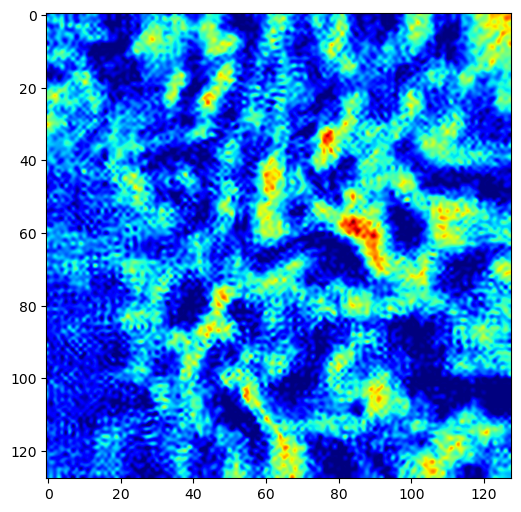

Elasped time:24.498
Elasped time:24.869Loss 0.000613    PSNR 22.844749    SSIM 0.215258 
Elasped time:25.197Loss 0.000582    PSNR 22.863900    SSIM 0.219416 
Elasped time:25.529Loss 0.000571    PSNR 22.569868    SSIM 0.215808 
Elasped time:25.837Loss 0.000512    PSNR 22.727442    SSIM 0.232464 


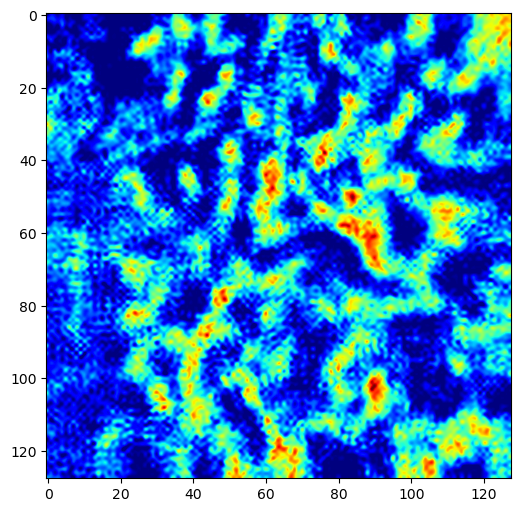

Elasped time:26.808
Elasped time:27.354Loss 0.000476    PSNR 22.510944    SSIM 0.227614 
Elasped time:27.726Loss 0.000472    PSNR 22.394172    SSIM 0.229346 
Elasped time:28.025Loss 0.000458    PSNR 22.337219    SSIM 0.220440 
Elasped time:28.357Loss 0.000421    PSNR 22.435095    SSIM 0.225202 


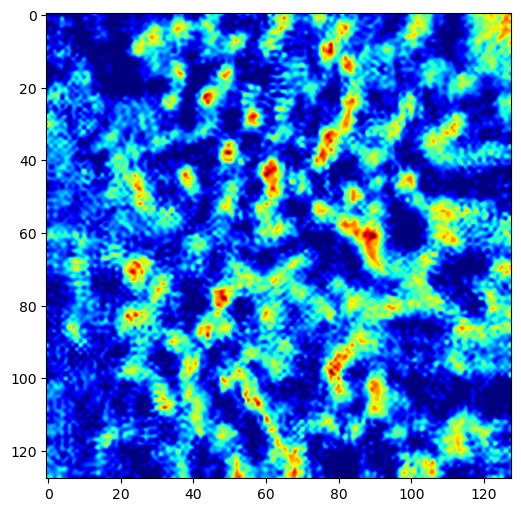

Elasped time:29.289
Elasped time:29.63 Loss 0.000449    PSNR 22.032048    SSIM 0.219630 
Elasped time:29.925Loss 0.000393    PSNR 22.200743    SSIM 0.230489 
Elasped time:30.272Loss 0.000373    PSNR 22.370481    SSIM 0.228842 
Elasped time:30.609Loss 0.000338    PSNR 22.257586    SSIM 0.242746 


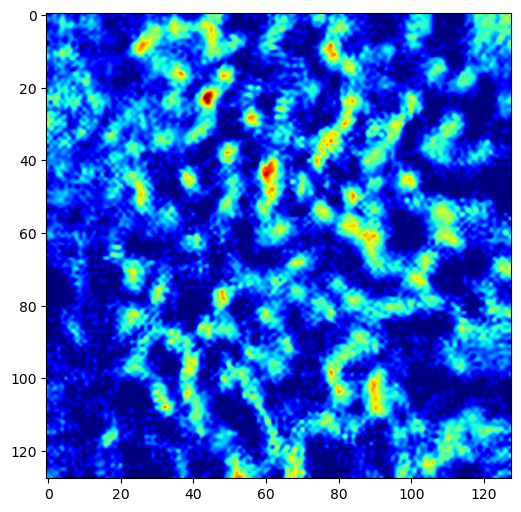

Elasped time:31.516
Elasped time:31.842Loss 0.000318    PSNR 22.126696    SSIM 0.239661 
Elasped time:32.183Loss 0.000310    PSNR 22.252605    SSIM 0.247915 
Elasped time:32.52 Loss 0.000297    PSNR 22.222476    SSIM 0.241882 
Elasped time:32.865Loss 0.000283    PSNR 22.180551    SSIM 0.247084 


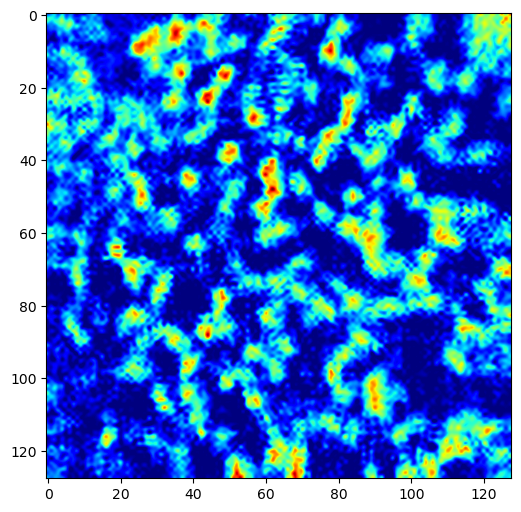

Elasped time:33.829
Elasped time:34.392Loss 0.000286    PSNR 22.099218    SSIM 0.235816 
Elasped time:34.71 Loss 0.000279    PSNR 22.262651    SSIM 0.237308 
Elasped time:35.048Loss 0.000244    PSNR 22.296982    SSIM 0.257297 
Elasped time:35.388Loss 0.000231    PSNR 22.300208    SSIM 0.252370 


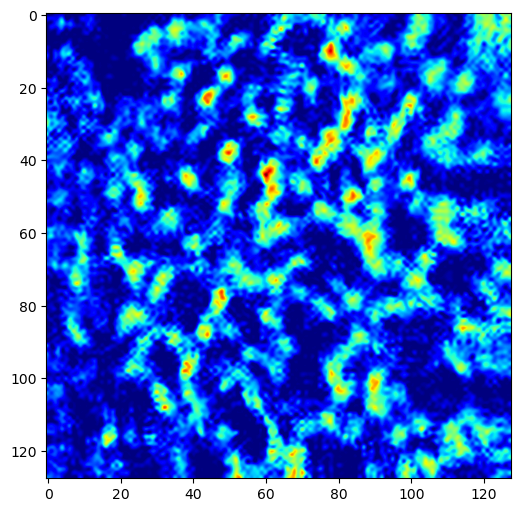

Elasped time:36.266
Elasped time:36.613Loss 0.000267    PSNR 22.179194    SSIM 0.245112 
Elasped time:36.904Loss 0.000204    PSNR 22.188306    SSIM 0.250835 
Elasped time:37.242Loss 0.000224    PSNR 22.217608    SSIM 0.256740 
Elasped time:37.585Loss 0.000213    PSNR 22.158177    SSIM 0.252449 


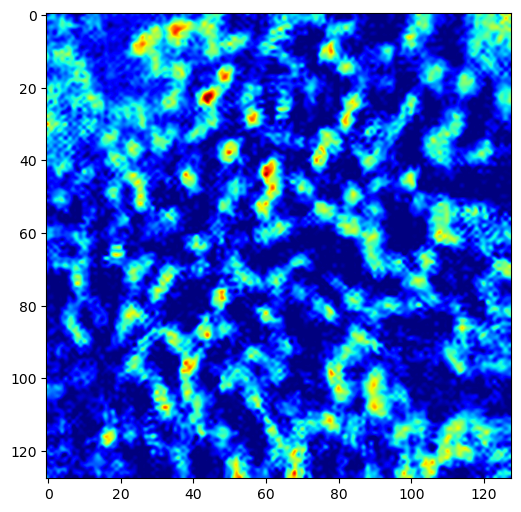

Elasped time:38.49
Elasped time:38.819Loss 0.000254    PSNR 21.984541    SSIM 0.246194 
Elasped time:39.154Loss 0.000194    PSNR 22.201712    SSIM 0.246922 
Elasped time:39.479Loss 0.000196    PSNR 22.054866    SSIM 0.243576 
Elasped time:39.814Loss 0.000192    PSNR 22.275877    SSIM 0.257237 


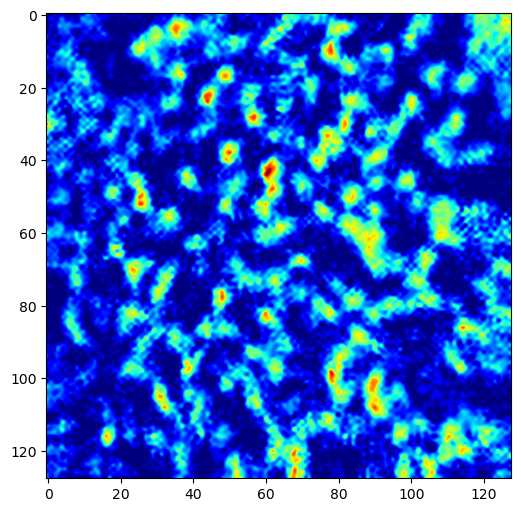

Elasped time:40.72
Elasped time:41.102Loss 0.000188    PSNR 22.074184    SSIM 0.247751 
Elasped time:41.474Loss 0.000174    PSNR 22.100732    SSIM 0.247213 
Elasped time:41.803Loss 0.000162    PSNR 22.250917    SSIM 0.256915 
Elasped time:42.133Loss 0.000183    PSNR 22.122601    SSIM 0.249283 


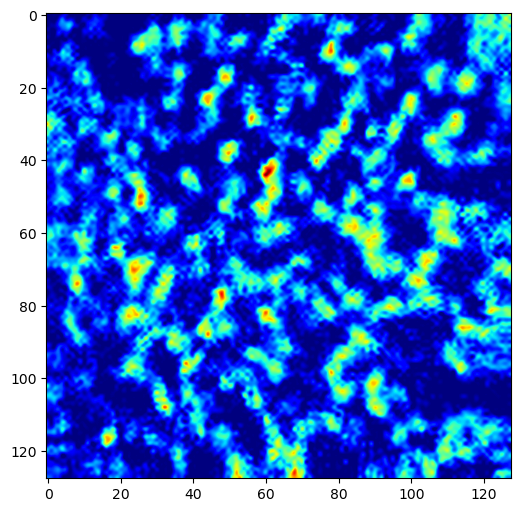

Elasped time:43.04
Elasped time:43.387Loss 0.000165    PSNR 22.173563    SSIM 0.256135 
Elasped time:43.695Loss 0.000168    PSNR 21.931655    SSIM 0.251533 
Elasped time:44.034Loss 0.000187    PSNR 22.065048    SSIM 0.257666 
Elasped time:44.359Loss 0.000154    PSNR 22.080528    SSIM 0.257237 


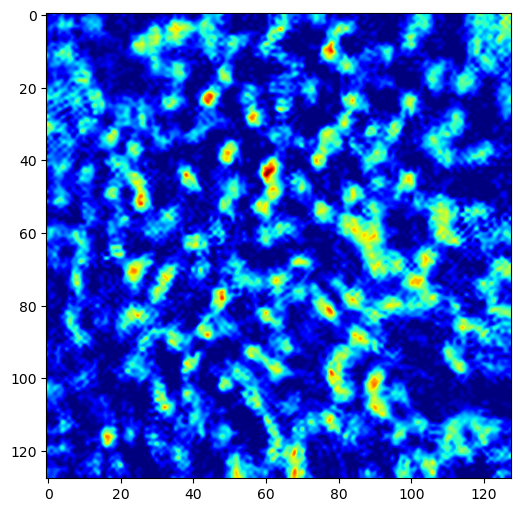

Elasped time:45.248
Elasped time:45.579Loss 0.000154    PSNR 22.080626    SSIM 0.259126 
Elasped time:45.906Loss 0.000211    PSNR 21.969363    SSIM 0.257350 
Elasped time:46.261Loss 0.000166    PSNR 22.051621    SSIM 0.253839 
Elasped time:46.605Loss 0.000148    PSNR 22.137665    SSIM 0.260351 


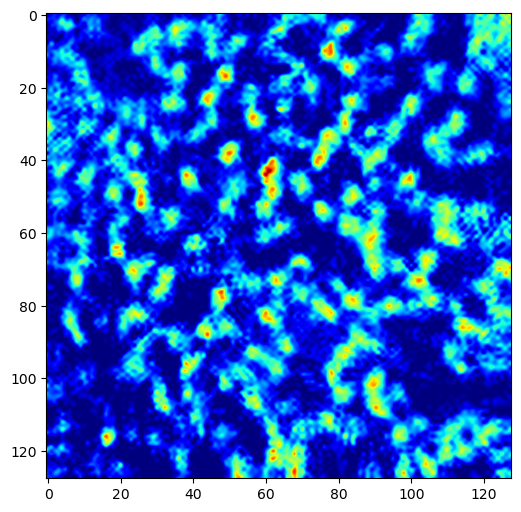

Elasped time:47.537
Elasped time:47.954Loss 0.000130    PSNR 22.044413    SSIM 0.258500 
Elasped time:48.349Loss 0.000148    PSNR 21.943691    SSIM 0.246149 
Elasped time:48.693Loss 0.000119    PSNR 22.095778    SSIM 0.262967 
Elasped time:49.006Loss 0.000115    PSNR 22.162943    SSIM 0.263552 


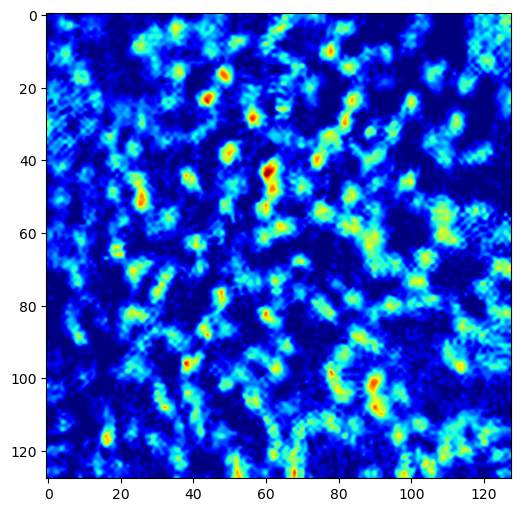

Elasped time:49.9
Elasped time:50.243Loss 0.000121    PSNR 22.165637    SSIM 0.261367 
Elasped time:50.558Loss 0.000113    PSNR 22.129405    SSIM 0.259033 
Elasped time:50.881Loss 0.000117    PSNR 22.068055    SSIM 0.268322 
Elasped time:51.214Loss 0.000169    PSNR 22.000589    SSIM 0.242687 


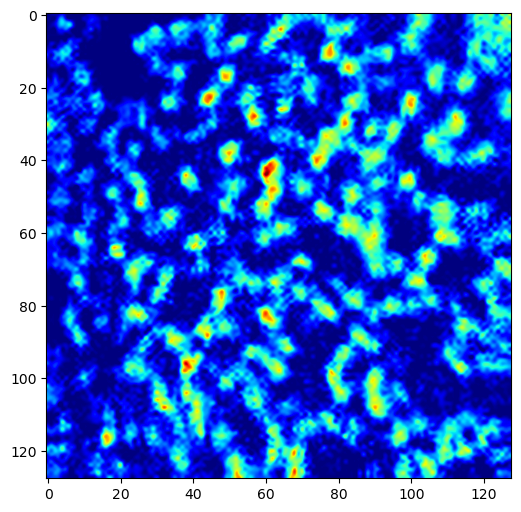

Elasped time:52.121
Elasped time:52.474Loss 0.000109    PSNR 22.212899    SSIM 0.263123 
Elasped time:52.879Loss 0.000114    PSNR 22.113454    SSIM 0.258915 
Elasped time:53.199Loss 0.000112    PSNR 22.040250    SSIM 0.265259 
Elasped time:53.52 Loss 0.000100    PSNR 22.187179    SSIM 0.271018 


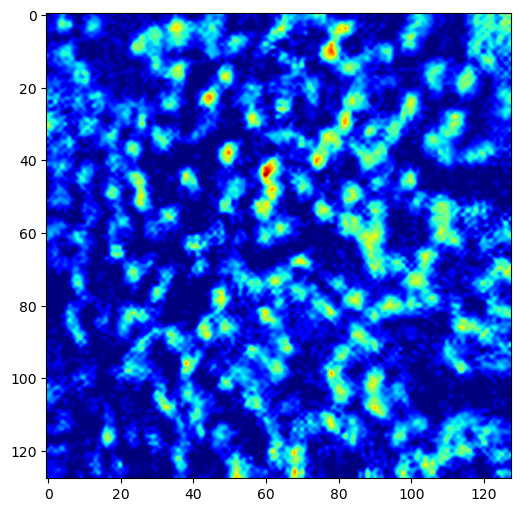

Elasped time:54.398
Elasped time:54.755Loss 0.000109    PSNR 22.040097    SSIM 0.266661 
Elasped time:55.074Loss 0.000127    PSNR 22.079999    SSIM 0.270359 
Elasped time:55.91 Loss 0.000109    PSNR 22.070149    SSIM 0.258727 
Elasped time:57.327Loss 0.000100    PSNR 22.031468    SSIM 0.269276 


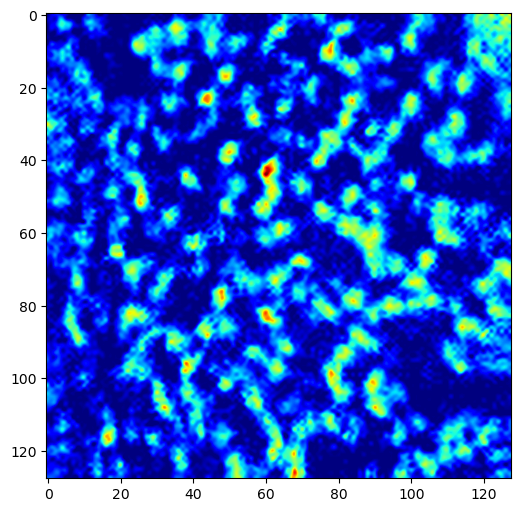

Elasped time:58.256
Elasped time:58.581Loss 0.000099    PSNR 22.099229    SSIM 0.262541 
Elasped time:58.914Loss 0.000126    PSNR 22.134038    SSIM 0.263526 
Elasped time:59.233Loss 0.000097    PSNR 22.160796    SSIM 0.279827 
Elasped time:59.579Loss 0.000116    PSNR 22.102713    SSIM 0.267754 


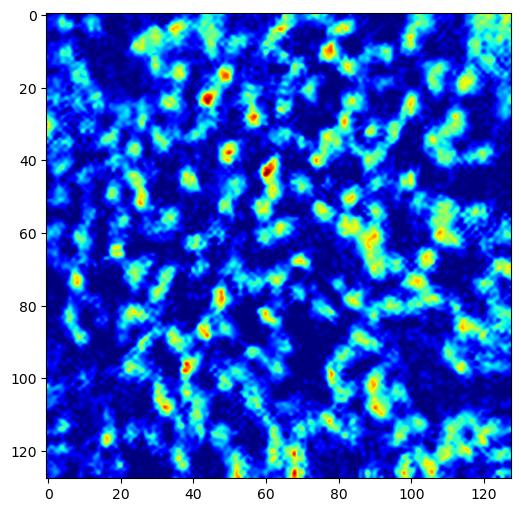

Elasped time:60.484
Elasped time:60.911Loss 0.000092    PSNR 22.180994    SSIM 0.273085 
Elasped time:61.43 Loss 0.000088    PSNR 22.168457    SSIM 0.273982 
Elasped time:62.999Loss 0.000106    PSNR 22.105673    SSIM 0.259561 
Elasped time:63.707Loss 0.000104    PSNR 21.982792    SSIM 0.258458 


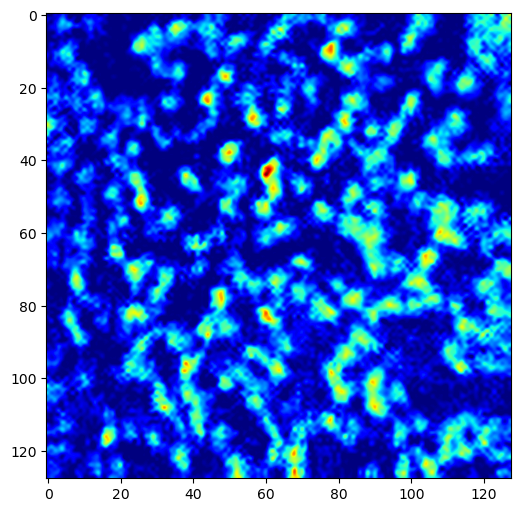

Elasped time:64.61
Elasped time:65.122Loss 0.000084    PSNR 22.172792    SSIM 0.274317 
Elasped time:65.406Loss 0.000083    PSNR 22.091926    SSIM 0.269761 
Elasped time:65.721Loss 0.000097    PSNR 22.105149    SSIM 0.273979 
Elasped time:66.033Loss 0.000085    PSNR 22.160055    SSIM 0.263502 


  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/32/ff/4a93a4623c3e5f97e8552af0f9f81d289dcf7f2ac71f1493f1c93a6b973d/torchvision-0.22.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for torch==2.7.1 from https://files.pythonhosted.org/packages/f9/91/3d709cfc5e15995fb3fe7a6b564ce42280d3a55676dad672205e94f34ac9/torch-2.7.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.10.0 from https://files.pythonhosted.org/packages/69/e0/552843e0d356fbb5256d21449fa957fa4eff3bbc135a74a691ee70c7c5da/typing_extensions-4.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for sympy>=1.13.3 from https://files.pythonhosted.org/packages/a2/09/77d55d46fd61b4a135c444fc97158ef34a095e5681d0a6c10b75bf356191/sympy-1.14.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 653.6 kB/s eta 0

ERROR: Could not install packages due to an OSError: [WinError 5] 存取被拒。: 'C:\\Users\\user\\anaconda3\\envs\\DIP\\Lib\\site-packages\\torchvision\\_C.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
import time
i = 0
psnr_history = [] 
loss_history = [] 
ssim_history = []
def closure():
    
    global i
    
    if param_noise:
        for n in [x for x in net.parameters() if len(x.size()) == 4]:
            n = n + n.detach().clone().normal_() * n.std() / 50
    
    net_input = net_input_saved
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
        
        
    out = net(net_input)    # output of network (1, 1, H, W)
   
    total_loss = mse(out * mask_var, img_var * mask_var)
    total_loss.backward()
    psnr = compare_psnr(img_np, torch_to_np(out), data_range = 1.0)
    ssim = compare_ssim(img_np[0,:], torch_to_np(out)[0,:], data_range = 1.0)
    # History
    loss_history.append(total_loss.item())
    psnr_history.append(psnr)
    ssim_history.append(ssim)

    print ('Iteration %05d    Loss %f    PSNR %f    SSIM %f' % (i, total_loss.item(), psnr, ssim), '\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)   
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
    if i % save_every == 0:
        out_np = torch_to_np(out)[0,:]
        out_log_np[i//save_every, :, :] = out_np
        print(f'Elasped time:{round(time.time() - start_time, 3)}')
        time_log_np[0, i//save_every] = round(time.time() - start_time, 3)
    i += 1
    return total_loss

start_time = time.time()
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

Show the final output of DIP

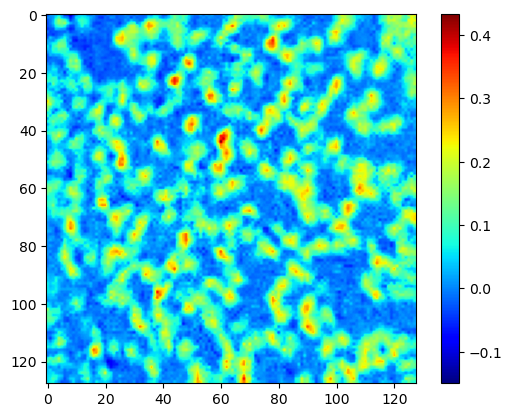

In [ ]:
img_out = torch_to_np(net(net_input))[0,:]
plt.imshow(img_out, cmap='jet')
plt.colorbar()

Text(0.5, 1.0, 'Reconstructed')

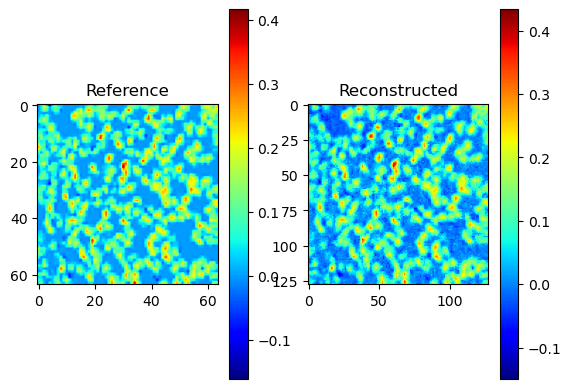

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(img_down, cmap='jet')
plt.colorbar()
plt.title('Reference')
plt.subplot(1, 2, 2)
plt.imshow(img_out, cmap='jet')
plt.colorbar()
plt.title('Reconstructed')

In [ ]:
print(f'Reference minimum: \t{img_down.min()},\tmaximum: {img_down.max()}')
print(f'Reconstructed minimum: \t{img_out.min()},\tmaximum: {img_out.max()}')

Reference minimum: 	-0.1607808300788482,	maximum: 0.4161385149253625
Reconstructed minimum: 	-0.14955343306064606,	maximum: 0.4335055351257324


In [ ]:
torch.cuda.empty_cache()